# IMPORT LIBRARIES

In [39]:
import warnings
warnings.filterwarnings('ignore')

import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

In [40]:
# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

## Loading and exploring data

In [41]:
#load the data set
col_names=["target", "id", "date", "flag", "user", "text"]
df=pd.read_csv("C:\\Cureya\\Twitter.csv", names=col_names)

In [42]:
#accesing first five datavalues
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [43]:
df.sample(5)

,target,id,date,flag,user,text
776771,0,2322239394,Wed Jun 24 22:16:35 PDT 2009,NO_QUERY,agentrh84,Dang half ashs family is coming to visit from ...
583151,0,2214849609,Wed Jun 17 17:19:12 PDT 2009,NO_QUERY,MsZsaZsa,I have a headache &amp; no food to feed my you...
1011801,4,1881138598,Fri May 22 03:43:47 PDT 2009,NO_QUERY,shauna89,goodnight! long day tomorrow
517445,0,2191299160,Tue Jun 16 04:58:49 PDT 2009,NO_QUERY,sonatael,@wayitcrumbles I've read...3? blog posts about...
719169,0,2260515879,Sat Jun 20 19:20:34 PDT 2009,NO_QUERY,xAllThatRemains,@d_hizzy im sorry but it's true. i would love ...


In [44]:
#all the columns in dataset
df.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')

In [45]:
#shape of dataset
df.shape

(1048576, 6)

In [46]:
print('length of data is', len(df))

length of data is 1048576


In [47]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1048576 non-null  int64 
 1   id      1048576 non-null  int64 
 2   date    1048576 non-null  object
 3   flag    1048576 non-null  object
 4   user    1048576 non-null  object
 5   text    1048576 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [48]:
df.dtypes

target     int64
id         int64
date      object
flag      object
user      object
text      object
dtype: object

In [49]:
#checking the null values
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [50]:
df['target'].unique()

array([0, 4], dtype=int64)

In [51]:
df['target'].nunique()

2

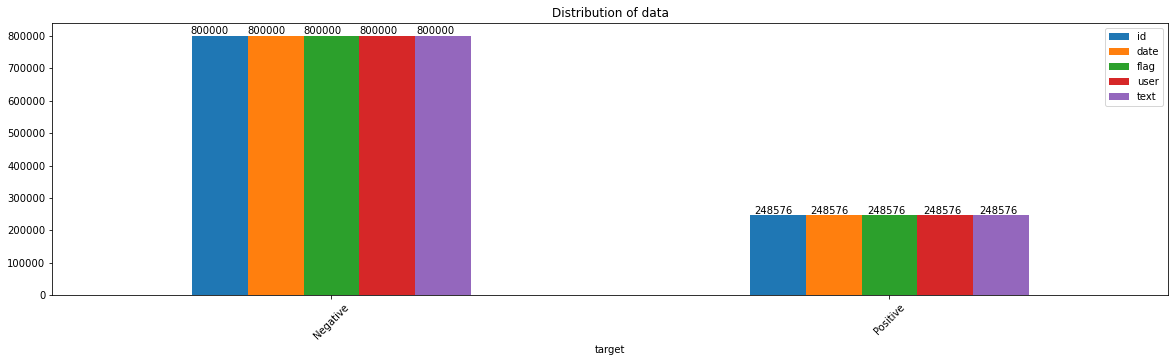

In [52]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=True,figsize=(20, 5))
ax.set_xticklabels(['Negative','Positive'], rotation=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

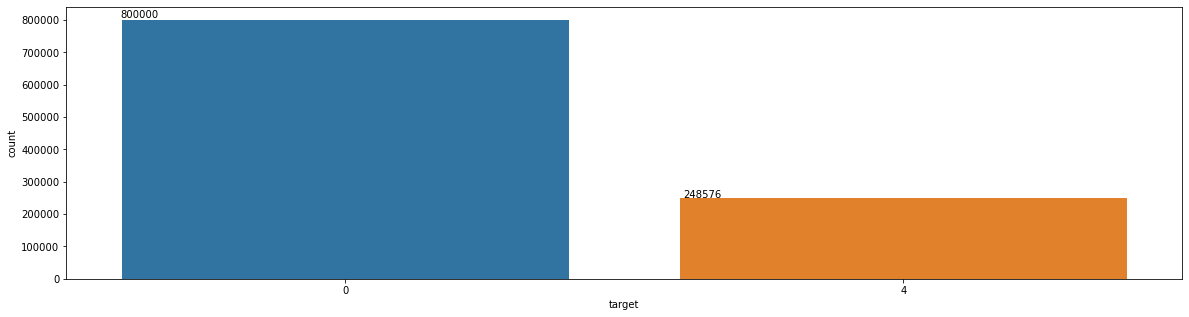

In [53]:
plt.figure(figsize = (20,5))
ax=sns.countplot(x='target', data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

In [54]:
data=df[['text','target']]
data.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [55]:
data['target'] = data['target'].replace(4,1)
data['target'].value_counts()

0    800000
1    248576
Name: target, dtype: int64

In [56]:
data['target'].unique()

array([0, 1], dtype=int64)

In [57]:
data_pos = data[data['target'] == 1]
data_pos.head()

,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1


In [58]:
data_neg = data[data['target'] == 0]
data_neg.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [59]:
data_pos = data_pos.iloc[:]
data_neg = data_neg.iloc[:]
dataset = pd.concat([data_pos, data_neg])
dataset.head()

,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1


## Data Cleaning

In [60]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].sample(5)

839951     @fragmentarie @gman67 don't be amazed  it just...
68556      @lelola i did talk to matt on the phone, he ca...
577262     wants to read some entertaining posts but no o...
911604     @kirstiealley: i like your crazy and witty hum...
1036408    @reimagin btw, thanks for the retweet! have a ...
Name: text, dtype: object

In [64]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].sample(5)

787529                                   mydc fkkk you man 
548395    searching for the best blackberry apps i miss ...
122739    jjgrella freaakkk  i missed all the new episod...
629050          ms ashford is leaving  ill miss you so much
177393    oh hey look north korea are going to kill us a...
Name: text, dtype: object

In [65]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].head()

800000            i love health4uandpets u guys r the best 
800001    im meeting up with one of my besties tonight c...
800002    darealsunisakim thanks for the twitter add sun...
800003    being sick can be really cheap when it hurts t...
800004       lovesbrooklyn2 he has that effect on everyone 
Name: text, dtype: object

In [66]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].head()

800000            i love health4uandpets u guys r the best 
800001    im meeting up with one of my besties tonight c...
800002    darealsunisakim thanks for the twitter add sun...
800003    being sick can be really cheap when it hurts t...
800004       lovesbrooklyn2 he has that effect on everyone 
Name: text, dtype: object

In [67]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].head()

800000             i love healthuandpets u guys r the best 
800001    im meeting up with one of my besties tonight c...
800002    darealsunisakim thanks for the twitter add sun...
800003    being sick can be really cheap when it hurts t...
800004        lovesbrooklyn he has that effect on everyone 
Name: text, dtype: object

In [68]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000             i love healthuandpets u guys r the best 
800001    im meeting up with one of my besties tonight c...
800002    darealsunisakim thanks for the twitter add sun...
800003    being sick can be really cheap when it hurts t...
800004        lovesbrooklyn he has that effect on everyone 
Name: text, dtype: object

In [69]:
X=dataset.text
X.sample(5)

69827     omg ive seen like  spiders within the last  ho...
576281    lovekelsey thats you saying youre glad they di...
879855    tommcfly im seeing you live tonight at ipswich...
838061           mirogechev hey happy easter  how are you  
813566    finally home going to bed up early for lil man...
Name: text, dtype: object

In [70]:
y=dataset.target
y.sample(5)

27836     0
337290    0
697399    0
440620    0
959733    1
Name: target, dtype: int64

# Data Visualization

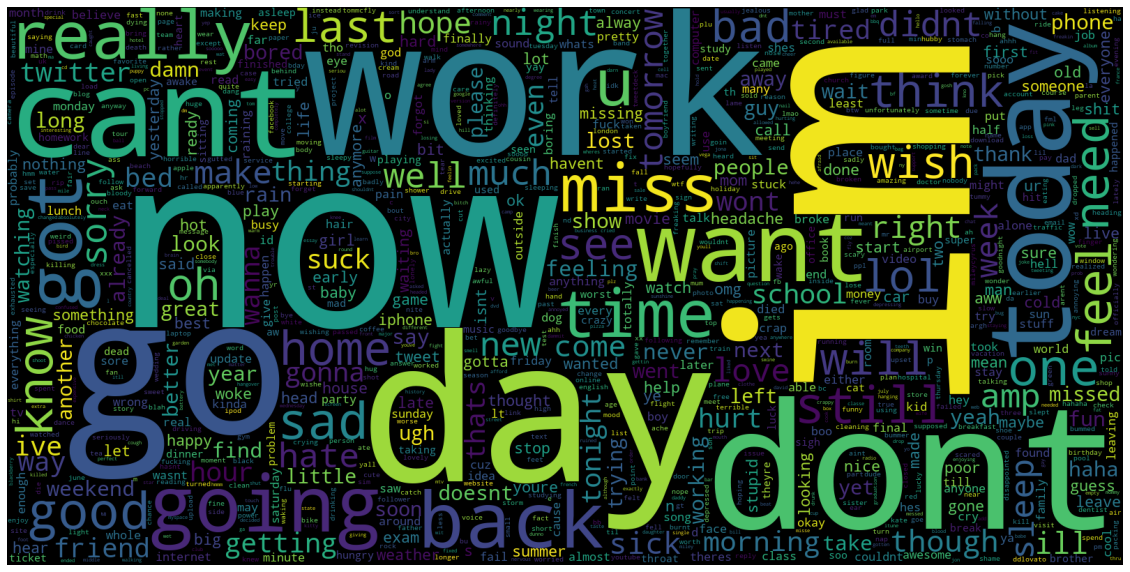

In [71]:
data_neg = dataset[dataset['target']==0]['text']
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(wc);

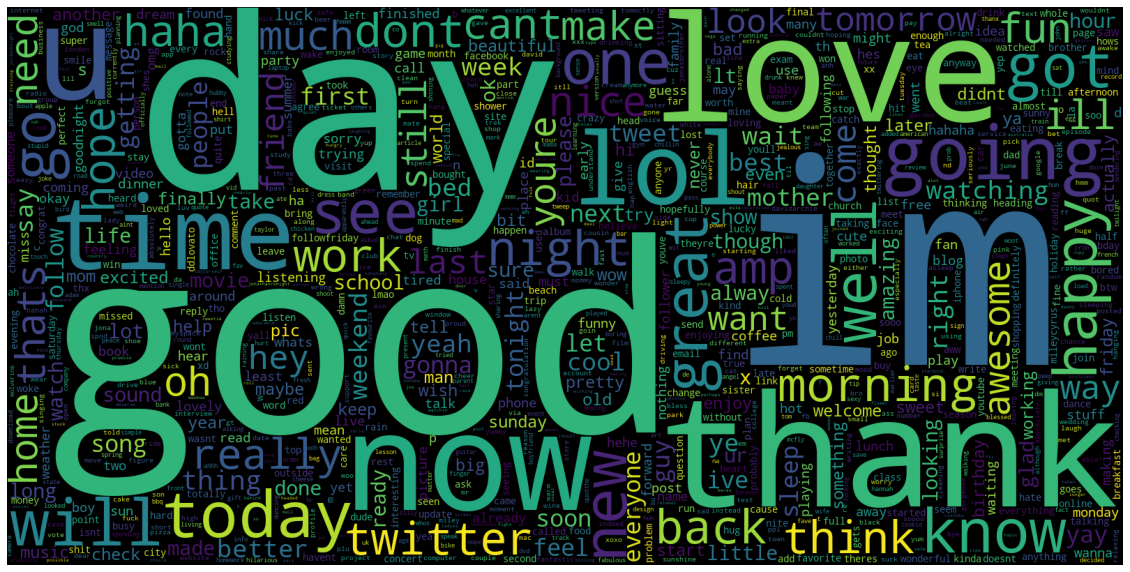

In [72]:
data_pos = dataset[dataset['target']==1]['text']
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(wc);

## Train test splitting

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state =42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((943718,), (104858,), (943718,), (104858,))

In [74]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  50000


In [75]:
X_train = vectoriser.transform(X_train)
X_train

<943718x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 15730916 stored elements in Compressed Sparse Row format>

In [76]:
X_test  = vectoriser.transform(X_test)
X_test

<104858x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 1743498 stored elements in Compressed Sparse Row format>

## Bernoulli Model

In [82]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1} : {v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     80000
           1       0.62      0.71      0.66     24858

    accuracy                           0.83    104858
   macro avg       0.76      0.79      0.77    104858
weighted avg       0.84      0.83      0.83    104858



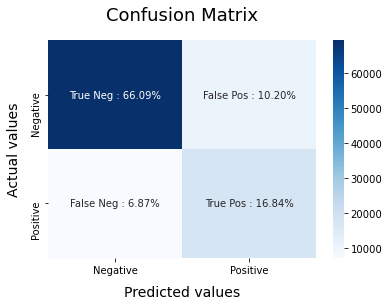

In [83]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

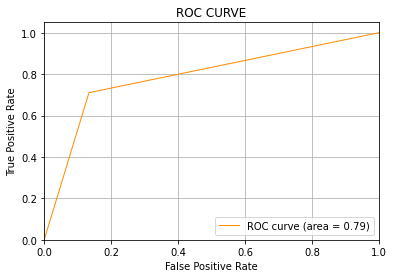

In [84]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.grid()

## Linear support vector classification

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     80000
           1       0.75      0.61      0.67     24858

    accuracy                           0.86    104858
   macro avg       0.82      0.77      0.79    104858
weighted avg       0.85      0.86      0.85    104858



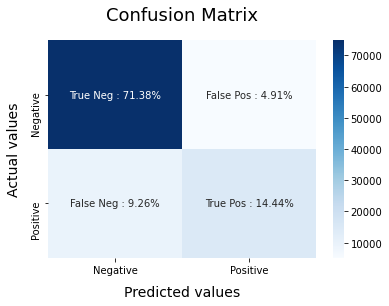

In [85]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

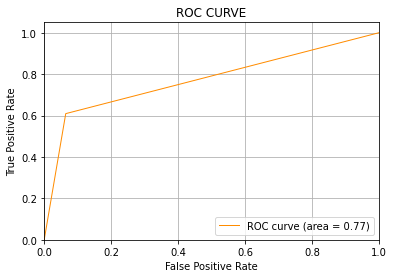

In [86]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.grid()

## Logistic Regression

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     80000
           1       0.77      0.60      0.67     24858

    accuracy                           0.86    104858
   macro avg       0.82      0.77      0.79    104858
weighted avg       0.86      0.86      0.86    104858



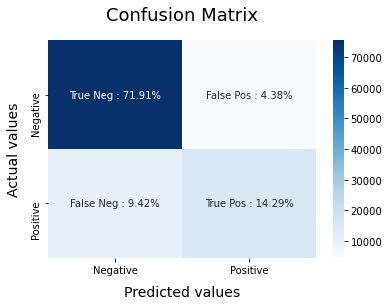

In [87]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

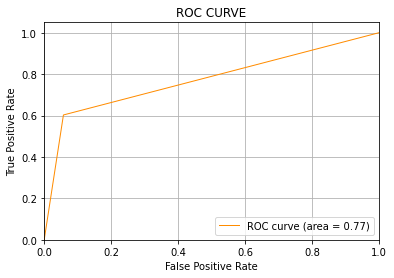

In [88]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.grid()